Dataset preparado ✔
Found 20451 images belonging to 2 classes.
Found 5366 images belonging to 2 classes.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │     2,166,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,190,497 (8.36 MB)

 Trainable params: 2,190,497 (8.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 54s 21ms/step - accuracy: 0.6984 - loss: 0.5678 - val_accuracy: 0.7622 - val_loss: 0.4947
Epoch 2/15
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 0.7912 - loss: 0.4464 - val_accuracy: 0.7853 - val_loss: 0.4572
Epoch 3/15
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 54s 21ms/step - accuracy: 0.8408 - loss: 0.3575 - val_accuracy: 0.8105 - val_loss: 0.4222
Epoch 4/15
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 0.8913 - loss: 0.2501 - val_accuracy: 0.8213 - val_loss: 0.4702
Epoch 5/15
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - accuracy: 0.9421 - loss: 0.1446 - val_accuracy: 0.8265 - val_loss: 0.5910
Epoch 6/15
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 47s 18ms/step - accuracy: 0.9679 - loss: 0.0885 - val_accuracy: 0.8317 - val_loss: 0.7430
Epoch 7/15
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 47s 18ms/step - accuracy: 0.9786 - loss: 0.0600 - val_accuracy: 0.8185 - val_loss: 0.7678
Epoch 8/15
2557/2557 ━━━━━━━━━━━━━━━━━━━━ 47s 18ms/step - accuracy: 0.9807 -

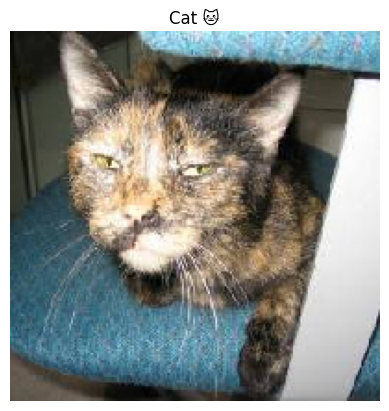

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

Imagen evaluada: dataset\test\cats\cat.0.jpg
Predicción: GATO 🐱


In [7]:
# ==========================================================
# 1) LIBRERÍAS
# ==========================================================
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

# ==========================================================
# 2) PARÁMETROS
# ==========================================================
IMG_SIZE = 200
BATCH_SIZE = 8
EPOCHS = 15

original_dir = "datasete"
base_dir = "dataset"

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# ==========================================================
# 3) CREAR ESTRUCTURA TRAIN / TEST
# ==========================================================
for folder in [train_dir, test_dir]:
    os.makedirs(os.path.join(folder, "cats"), exist_ok=True)
    os.makedirs(os.path.join(folder, "dogs"), exist_ok=True)

files = os.listdir(original_dir)

cats = [f for f in files if f.startswith("cat")]
dogs = [f for f in files if f.startswith("dog")]

cats_train, cats_test = train_test_split(cats, test_size=0.2, random_state=42)
dogs_train, dogs_test = train_test_split(dogs, test_size=0.2, random_state=42)

def copy_files(file_list, target_folder):
    for f in file_list:
        shutil.copy(
            os.path.join(original_dir, f),
            os.path.join(target_folder, f)
        )

copy_files(cats_train, os.path.join(train_dir, "cats"))
copy_files(cats_test, os.path.join(test_dir, "cats"))
copy_files(dogs_train, os.path.join(train_dir, "dogs"))
copy_files(dogs_test, os.path.join(test_dir, "dogs"))

print("Dataset preparado ✔")

# ==========================================================
# 4) GENERADORES (BAJO CONSUMO DE RAM)
# ==========================================================
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# ==========================================================
# 5) MODELO CNN LIGERO
# ==========================================================
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ==========================================================
# 6) ENTRENAMIENTO
# ==========================================================
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

# ==========================================================
# 7) MOSTRAR UNA IMAGEN DEL TRAIN
# ==========================================================
images, labels = next(train_generator)

plt.imshow(images[0])
plt.title("Dog 🐶" if labels[0]==1 else "Cat 🐱")
plt.axis("off")
plt.show()

# ==========================================================
# 8) PREDICCIÓN SOBRE UNA IMAGEN ESPECÍFICA
# ==========================================================
img_path = test_generator.filepaths[0]  # toma una imagen del test

img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

print("\nImagen evaluada:", img_path)

if prediction[0][0] > 0.5:
    print("Predicción: PERRO 🐶")
else:
    print("Predicción: GATO 🐱")


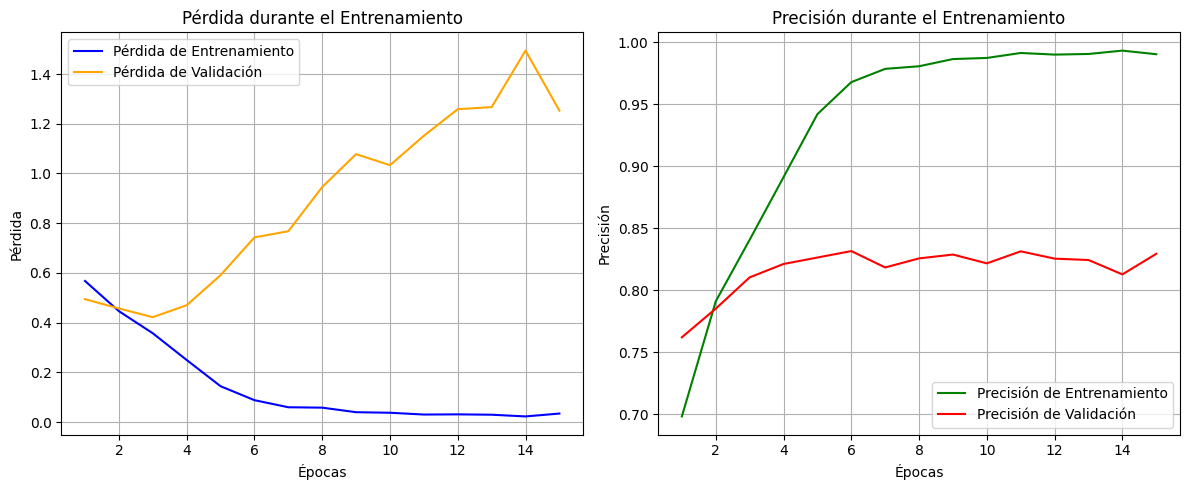

In [ ]:
#Extrayendo los datos de salida para interpretar resultados 

# Datos extraídos de tu salida
epochs = range(1, 16)  # 15 épocas

# Pérdida (loss)
loss_train = [0.5678, 0.4464, 0.3575, 0.2501, 0.1446, 0.0885, 0.0600, 0.0584, 0.0401, 0.0379, 0.0307, 0.0314, 0.0300, 0.0231, 0.0347]
loss_val = [0.4947, 0.4572, 0.4222, 0.4702, 0.5910, 0.7430, 0.7678, 0.9454, 1.0778, 1.0334, 1.1515, 1.2586, 1.2669, 1.4940, 1.2528]

# Precisión (accuracy)
accuracy_train = [0.6984, 0.7912, 0.8408, 0.8913, 0.9421, 0.9679, 0.9786, 0.9807, 0.9865, 0.9874, 0.9914, 0.9901, 0.9906, 0.9933, 0.9904]
accuracy_val = [0.7622, 0.7853, 0.8105, 0.8213, 0.8265, 0.8317, 0.8185, 0.8258, 0.8289, 0.8218, 0.8315, 0.8256, 0.8245, 0.8129, 0.8295]

# Gráfico de Pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_train, label='Pérdida de Entrenamiento', color='blue')
plt.plot(epochs, loss_val, label='Pérdida de Validación', color='orange')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

# Gráfico de Precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_train, label='Precisión de Entrenamiento', color='green')
plt.plot(epochs, accuracy_val, label='Precisión de Validación', color='red')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Interpretacion

Grafica Perdida durante el Entrenamiento:

La curva Perdida de entrenamiento muestra como cambia la perdida del modelo en el conjunto de entrenamiento a medida que avanzan las epocas. Mientras que la curva de Perdida de Validacion muestra la perdida en el conjunto que forma parte del test (subconjunto de datos que no se utilizan para entrenar el modelo). El escenario ideal es que ambas curvas disminuyan a medida que avanzan las epocas, ya que indica que el modelo esta aprendiendo y generalizando bien.

Ahora bien, el grafico muestra un aumento de la Perdida de Validacion mientras que la Perdida de Entrenamiento sigue disminuyendo, esto puede ser un signo de sobreajuste, es decir, el modelo esta aprendiendo patrones especificos del conjunto de entrenamiento pero no generaliza bien a datos no vistos. En varias corridas se ha podido observar esta situacion.

Precision durante el Entreamiento:

La curva de Precision de Entrenamiento muestra como cambia la precision del modelo en el conjunto de entrenamiento a medida que avanzan las epocas, mientras que la Precision de Validacion muestra la precision en el conjunto usado como test.

El escenario ideal es que ambas curvas aumenten, ya que seria una buena senal de que el modelo esta mejorando en su capacidad para clasificar correctamente.

En el grafico Precision durante el Entrenamiento, se observa poca variacion o estabilizacion de la Precision de Validacion mientras la Precision de Entrenamiento sigue aumentando, esto es tambien es un indicativo de sobreajuste, es decir el modelo esta aprendiendo demasiado bien los datos de entrenamiento pero no puede generalizar a nuevos datos.

En conclusion, el modelo presenta signos de sobreajute, razon por la cual se podrian ajustar hiperparametros (lo cual se llevo a cabo no habiendo variaciones significativas en las curvas), implementar Early Stopping (tecnica que detiene el entrenamiento cuando la perdida de validacion comienza a aumentar, esto ayuda a prevenir el sobreajuste y a encontrar un modelo mas generalizable), aumento de datos (esto ayudaria a enriquecer la fase de entreamiento y asi el modelo pueda aprender caracteristicas mas robustas para generalizar mejor).
